# **TCC do Curso de Ciência de dados & Big Data da PUC Minas**

# ANÁLISE DE SENTIMENTO DE COMENTÁRIOS SOBRE MARCAS DE CONSUMO COM MACHINE LEARNING


### 1 - Definição do problema:

O atual trabalho tem como objetivo extrair dados de sentimento em uma plataforma específica, como um site de avaliação ou suporte ao cliente. Os dados utilizados neste projeto treinam algoritmo de computador para entender o texto de ma-neiras semelhantes aos humanos e classificá-los de maneiras positivas, negativas ou neutras.


### 2 -  Importando as bibliotecas

- Pandas:
    - Usei para manipular dados.
- Numpy:
    - Usei para trabalhar com computação numerica.
- String:
    - Usei para manipular strings.
- Sklearn:
    - Biblioteca de machine learning
    - TfidfVectorizer
    - train_test_split
    - classification_report
    - Algoritmos:
        - LogisticRegression
        - DecisionTreeClassifier
        - RandomForestClassifier
        - Naive Bayes
    - Metodos de testamento da acurácia dos algoritmos
        - DummyClassifier
        - cross_validate
        - accuracy_score
        - KFold
        - confusion_matrix
- Re:
    - Manipular textos e padroniza-los.

- matplotlib:
    - Trabalhar com visualizações em gráficos.

- BeautifulSoup;
    - Extração de dados em arquivos web/html.
    - Extrair informações específicas e realizar a raspagem de dados (web scraping)

- requests:
    - Como precisei acessar a web para fazer raspagem de dados de um site, tive que fazer uma requisição HTTP usando a biblioteca requests.

In [1]:
import pandas as pd
import numpy as np
import sys
import string
from  sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
import re
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests



In [2]:
print("Versão do Python:")
print(sys.version)

Versão do Python:
3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


### 3 - Coleta de dados

Nesse trabalho foram utilizadas 2 fontes de dados, são elas:

1. Base encontrada no kagle sobre comentarios de sentimento de clientes sobre os produtos da empresa Dell;
2. Base gerada por meio de raspagem de dados de um site de comentarios de clientes sobre a empresa OpenAI.

#### 3.1 - Leitura

In [3]:
df = pd.read_csv(r'C:\Users\Thiago\Desktop\TCC\GitHub\Analise de sentimentos\TCC_POS_GRADUACAO_PUC_THIAGO_BERBERICH_CABRAL.ipynb')

- Exibir as cinco primeiras linhas do DataFrame gerado pelo arquivo csv

In [4]:
df.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Username,sentiment,sentiment_score,emotion,emotion_score
0,0,2022-09-30 23:29:15+00:00,1575991191170342912,@Logitech @apple @Google @Microsoft @Dell @Len...,ManjuSreedaran,neutral,0.853283,anticipation,0.587121
1,1,2022-09-30 21:46:35+00:00,1575965354425131008,@MK_habit_addict @official_stier @MortalKombat...,MiKeMcDnet,neutral,0.519470,joy,0.886913
2,2,2022-09-30 21:18:02+00:00,1575958171423752203,"As @CRN celebrates its 40th anniversary, Bob F...",jfollett,positive,0.763791,joy,0.960347
3,3,2022-09-30 20:05:24+00:00,1575939891485032450,@dell your customer service is horrible especi...,daveccarr,negative,0.954023,anger,0.983203
4,4,2022-09-30 20:03:17+00:00,1575939359160750080,@zacokalo @Dell @DellCares @Dell give the man ...,heycamella,neutral,0.529170,anger,0.776124


- Verifico o nome das colunas do dataframe

In [5]:
df.columns

Index(['Unnamed: 0', 'Datetime', 'Tweet Id', 'Text', 'Username', 'sentiment',
       'sentiment_score', 'emotion', 'emotion_score'],
      dtype='object')

- Verificando o tipo de cada variável

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24970 entries, 0 to 24969
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       24970 non-null  int64  
 1   Datetime         24970 non-null  object 
 2   Tweet Id         24970 non-null  int64  
 3   Text             24970 non-null  object 
 4   Username         24970 non-null  object 
 5   sentiment        24970 non-null  object 
 6   sentiment_score  24970 non-null  float64
 7   emotion          24970 non-null  object 
 8   emotion_score    24970 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 1.7+ MB


#### 4 - Processamento/Tratamento de Dados

- Verifico quantas linhas e quantas colunas no dataframe

In [7]:
df.shape

(24970, 9)

- Verifico se tem nulos no dataframe

In [8]:
df.isna().sum()


Unnamed: 0         0
Datetime           0
Tweet Id           0
Text               0
Username           0
sentiment          0
sentiment_score    0
emotion            0
emotion_score      0
dtype: int64

- Verifico se tem linhas duplicadas no dataframe e se tiver eu excluo.

In [9]:
df = df.drop_duplicates()



- Renomeio as colunas do dataframe

In [10]:

df.rename(columns ={
    'Unnamed: 0': 'id',
    'Datetime': 'data_horario',
    'Text': 'texto',
    'Username': 'usuario',
    'sentiment': 'sentimento',
    'sentiment_score': 'sentimento_score',
    'emotion': 'emoji',
    'emotion_score': 'emoji_score'
}, inplace=True )



- Deletar colunas que não serão úteis

In [11]:
df = df.drop(['data_horario', 'Tweet Id', 'usuario', 'sentimento_score', 'emoji_score'], axis=1)

- Substituir 'positive' por 0, 'negative' por 1 na coluna 'sentimento' e 'neutral como 2'


In [12]:
df['sentimento'] = df['sentimento'].replace({'positive': 0, 'negative': 1, 'neutral': 2})

- Amostragem aleatória do meu dataframe que estava todo separado por sentimento e agora está misturado

In [13]:
df = df.sample(frac = 1)
df

,id,texto,sentimento,emoji
2294,2294,Ordered a cable from @Dell (because they had a...,0,disgust
18415,18415,"Now that I have a @Dell, I am going to complai...",1,anger
22599,22599,@Dell @DellOutlet\nExtremely disappointed from...,1,anger
5283,5283,@PriyankKharge @CMofKarnataka It's high time I...,2,anticipation
9073,9073,#facebookdown @TheRock @steveaustinBSR @WWEUn...,2,fear
...,...,...,...,...
14513,14513,@elonmusk @MichaelDell @Twitter @Dell @emc too...,0,joy
10564,10564,i am very worried i am talking to dell for ser...,1,fear
13639,13639,@Dell @DellOutlet hey i have raised my concern...,1,disgust
9469,9469,@Dell have so much bad service provider there ...,1,anger


- Criei uma função para converter o texto para minusculo, removendo os espaços extras, caracteres especiais, url e links.

In [14]:
def conversao_de_texto(texto):
    texto = texto.lower()
    texto = re.sub('\[.*?\]', '', texto)
    texto = re.sub("\\W"," ",texto)
    texto = re.sub('https?://\S+|www\.\S+', '', texto)
    texto = re.sub('<.*?>+', '', texto)
    texto = re.sub('[%s]' % re.escape(string.punctuation), '', texto)
    texto = re.sub('\n', '', texto)
    texto = re.sub('\w*\d\w*', '', texto)

    return texto

- Aplicando a função criada na coluna texto do dataframe

In [15]:
df['texto'] = df['texto'].apply(conversao_de_texto)
df.head()

,id,texto,sentimento,emoji
2294,2294,ordered a cable from dell because they had a...,0,disgust
18415,18415,now that i have a dell i am going to complai...,1,anger
22599,22599,dell delloutlet extremely disappointed from ...,1,anger
5283,5283,priyankkharge cmofkarnataka it s high time i...,2,anticipation
9073,9073,facebookdown therock steveaustinbsr wweun...,2,fear


### 5 - Análise e Exploração dos dados

 - Verificando os dados únicos por coluna para checar distribuição

In [16]:
for column in df.columns:
    print(f'Coluna {column}: {df[column].unique()}')
    print('------------' *10)

Coluna id: [ 2294 18415 22599 ... 13639  9469  9385]
------------------------------------------------------------------------------------------------------------------------
Coluna texto: ['ordered a cable from  dell  because they had a good price  and it s just a boring old cable    the box came with two address labels   one had my complete address   the other one had the  line of my address printed as the word  null    good job  software '
 'now that i have a  dell  i am going to complain about apple less   do you know that unless you purchase a premium support contract  dell will absolutely not support any of the software on its     alienware computers  products that comprise both hardware and software '
 ' dell  delloutlet extremely disappointed from your repair and replacement policy and execution  for a simple keyboard change is taking more than the months to change '
 ...
 ' dell  delloutlet hey i have raised my concern on friday but i haven t received any update on it '
 ' dell

- Verificando a divisão de nosso dataset e balanceamento das classes

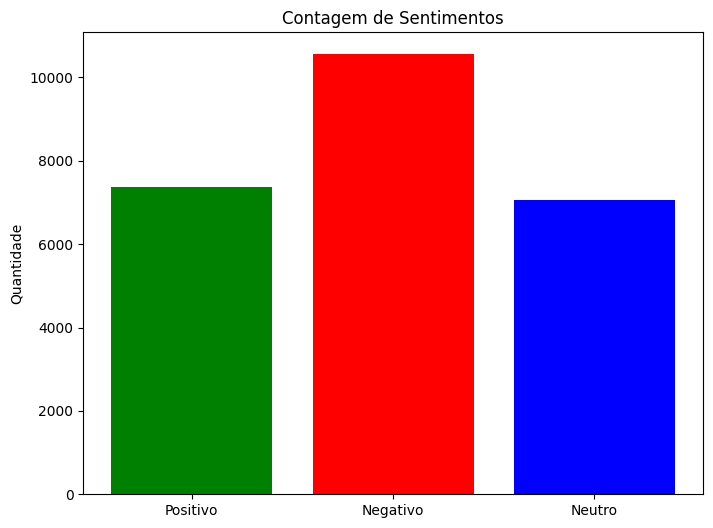

In [17]:
# Calculando as contagens de sentimentos
contagem_sentimento_0 = (df['sentimento'] == 0).sum()
contagem_sentimento_1 = (df['sentimento'] == 1).sum()
contagem_sentimento_2 = (df['sentimento'] == 2).sum()

# Criando os rótulos das colunas
sentimentos = ['Positivo', 'Negativo', 'Neutro']

# Criando as contagens
contagens = [contagem_sentimento_0, contagem_sentimento_1, contagem_sentimento_2]

# Criando o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(sentimentos, contagens, color=['green', 'red', 'blue'])
plt.ylabel('Quantidade')
plt.title('Contagem de Sentimentos')
plt.show()



### 6 - Criação de modelos de machine learning
####  6.1 - Treinando, avaliando e aplicando em modelos de ML

Na etapa de criação dos modelos de machine learning, foram selecionados 4 algoritmos a fim de avaliar qual apresenta o melhor desempenho, eles são:
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. Naive Bayes

- Separação em features e classes

In [18]:
X = df['texto'].values
Y = df['sentimento'].values

- Dividindo o conjunto de dados em conjunto de treinamento e conjunto de teste
    - O conjunto de teste representará 25% do conjunto de dados original, enquanto o conjunto de treinamento será composto pelos 75% restantes.

    - x_train será o conjunto de características usado para treinar o modelo.
    - x_test será o conjunto de características usado para avaliar o desempenho do modelo.
    - y_train serão os rótulos correspondentes ao conjunto de treinamento.
    - y_test serão os rótulos correspondentes ao conjunto de teste.


In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=50)
print("Treinamos com {} elementos e testaremos com {} elementos".format(len(x_train), len(x_test)))


Treinamos com 18727 elementos e testaremos com 6243 elementos


- Converter de texto para número (Utilizando o método TF-IDF)
    -  Essa etapa de vetorização é importante porque a maioria dos algoritmos de aprendizado de máquina trabalha com dados numéricos,
    e a representação TF-IDF é uma maneira comum de transformar texto em uma forma numérica que pode ser usada em modelos de
    aprendizado de máquina.

- TfidfVectorizer() é uma classe do scikit-learn que converte uma coleção de documentos de texto em uma matriz de recursos TF-IDF.
- xv_train será a representação TF-IDF dos textos no conjunto de treinamento.
-  xv_test será a representação TF-IDF dos textos no conjunto de teste.


In [20]:
vectorizer = TfidfVectorizer()
xv_train = vectorizer.fit_transform(x_train)
xv_test = vectorizer.transform(x_test)

#### 6.1.1 - Logistic Regression

- Treinando o modelo de teste


In [21]:
lr = LogisticRegression()
lr.fit(xv_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

- Previsão


In [22]:
previsao_lr = lr.predict(xv_test)
acuracia = accuracy_score(y_test, previsao_lr)
f'Acurácia: {acuracia * 100: .2f} %'

'Acurácia:  77.48 %'

In [23]:
print(classification_report(y_test, previsao_lr))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1842
           1       0.82      0.87      0.84      2639
           2       0.68      0.64      0.66      1762

    accuracy                           0.77      6243
   macro avg       0.76      0.76      0.76      6243
weighted avg       0.77      0.77      0.77      6243



-  Fazendo testes para saber se o resultado do treinamento foi bom ou ruim.


In [24]:
# Para testar se as acurácia estão boas ou ruim --- Usando como baseline
dummy = DummyClassifier()
dummy.fit(xv_train, y_train)
previsoes_dummy = dummy.predict(x_test)

acuracia_dummy = accuracy_score(y_test, previsoes_dummy) * 100
print("A acurácia do dummy foi %.2f%%" % acuracia_dummy)

A acurácia do dummy foi 42.27%


#### 6.1.2 - Árvore de Decisão

-  Vou treinar um modelo de Árvore de Decisão (dt) usando xv_train como conjunto de caracteristicas e y_train como conjunto de rótulos

In [25]:
dt = DecisionTreeClassifier()
dt.fit(xv_train, y_train)

DecisionTreeClassifier()

-  Agora, com o modelo treinado, irei fazer previsão usando o modelo com o dados de teste
- xv_test são as caracteristicas dos dados de teste

In [26]:
previsao_dt = dt.predict(xv_test)


- Calculando a acurácia do modelo de árvore de decisão


In [27]:
acuracia = accuracy_score(y_test, previsao_dt)
f'Acurácia: {acuracia * 100: .2f} %'

'Acurácia:  63.09 %'

In [28]:
print(classification_report(y_test, previsao_dt))

              precision    recall  f1-score   support

           0       0.63      0.60      0.61      1842
           1       0.71      0.72      0.71      2639
           2       0.52      0.53      0.53      1762

    accuracy                           0.63      6243
   macro avg       0.62      0.62      0.62      6243
weighted avg       0.63      0.63      0.63      6243



#### 7.1.3 - Random Forest Classifier

In [29]:
# Criando uma instancia do classificador de Floresta Aleatória
rfc = RandomForestClassifier(random_state=0)

# Treinando o modelo de Randon Forest
rfc.fit(xv_train, y_train)



RandomForestClassifier(random_state=0)

In [30]:
# Fazendo previsões com base nos dados treinados
# Usando as caracteristicas dos dados de teste
previsao_rfc = rfc.predict(xv_test)


acuracia = accuracy_score(y_test, previsao_rfc)
f'Acurácia: {acuracia * 100: .2f} %'

# O algoritmo classificador de floresta aleatória acerta 99% das previsões

'Acurácia:  72.99 %'

In [31]:
print(classification_report(y_test, previsao_rfc))

              precision    recall  f1-score   support

           0       0.80      0.66      0.72      1842
           1       0.72      0.90      0.80      2639
           2       0.69      0.54      0.61      1762

    accuracy                           0.73      6243
   macro avg       0.73      0.70      0.71      6243
weighted avg       0.73      0.73      0.72      6243



#### 7.1.4 - Naive Bayes

In [32]:
# Crie uma instância do modelo Naive Bayes
nb = MultinomialNB()


In [33]:
# Supondo que 'X_train' são os recursos e 'y_train' são os rótulos
nb.fit(xv_train, y_train)


MultinomialNB()

In [34]:
# Faça previsões no conjunto de teste
previsao_nb = nb.predict(xv_test)

# Avalie o desempenho do modelo
acuracia = accuracy_score(y_test, previsao_nb)
f'Acurácia: {acuracia * 100: .2f} %'



'Acurácia:  68.59 %'

In [35]:
print(classification_report(y_test, previsao_nb))


              precision    recall  f1-score   support

           0       0.78      0.64      0.70      1842
           1       0.63      0.98      0.77      2639
           2       0.80      0.30      0.44      1762

    accuracy                           0.69      6243
   macro avg       0.74      0.64      0.64      6243
weighted avg       0.72      0.69      0.65      6243



In [36]:
def imprimir_resultados(results):
    media = results['test_score'].mean()
    print(f"Acurácia média na validação cruzada: {media * 100:.2f}%")
    desvio_padrao = results['test_score'].std()
    print("Accuracy com cross validation = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))


In [37]:
# Aplicando o metodo de validação cruzada - Cross Validation

modelo_lr = LogisticRegression()
cv = KFold(n_splits = 10, shuffle= True)
results = cross_validate(modelo_lr, xv_train, y_train, cv = cv, return_train_score=False)
imprimir_resultados(results)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Acurácia média na validação cruzada: 77.78%
Accuracy com cross validation = [75.52, 80.03]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 7 - Interpretação dos resultados

In [38]:
url = 'https://www.producthunt.com/products/chatgpt-1/reviews?rating=0&order=LATEST'

In [39]:
page = requests.get(url)

In [40]:
soap = BeautifulSoup(page.text,'html')

In [41]:
# Encontrar as tags que contêm os comentários
# Ajuste isso com base na estrutura HTML da página
comment_tags = soap.find_all('div', class_='styles_htmlText__iftLe styles_format__k3_8m italic-default color-lighter-grey fontSize-18 fontWeight-400 styles_overallExperience__x7Gqf')  # Substitua 'div' e 'comment-class' pelos valores reais



In [42]:
# Extrair o texto dos comentários
comments = [comment.get_text() for comment in comment_tags]



In [43]:
# Criar um DataFrame pandas
df_teste = pd.DataFrame({'Comments': comments})
df_teste

,Comments
0,Use this daily for numerous tasks
1,"As a frequent user of ChatGPT, I'm continually..."
2,nice but not bad either..
3,This app saved me a lot of time making up text...
4,It's one of the best innovations of this decade.
5,Fantastic thing... Boost my productivity
6,Significantly accelerates the development proc...
7,"Dear J e t h a c k s and Team, My husband Jo..."
8,Tool for using every day. Must have.
9,"Since its launch, ChatGPT has taken the tech w..."


In [44]:

# Função para converter a polaridade numérica em rótulo
def output_label(n):
    if n == 0:
        return "Positivo"
    elif n == 1:
        return "Negativo"
    elif n == 2:
        return "Neutro"

# Função para prever polaridade
def prever_polaridade(comentario):
    df_teste['Comments'] = df_teste['Comments'].apply(conversao_de_texto)
    comentario_vectorized = vectorizer.transform([comentario])

    # Substitua os próximos três comandos pelos seus modelos específicos
    pred_LR = lr.predict(comentario_vectorized)[0]
    pred_RFC = rfc.predict(comentario_vectorized)[0]
    pred_DT = dt.predict(comentario_vectorized)[0]
    pred_NB = nb.predict(comentario_vectorized)[0]

    return pd.Series({
        'LR_Prediction': output_label(pred_LR),
        'RFC_Prediction': output_label(pred_RFC),
        'DT_Prediction': output_label(pred_DT),
        'NB_Preiction': output_label(pred_NB)
    })

# Aplicar a função de previsão ao longo das linhas do DataFrame
df_resultado = df_teste['Comments'].apply(prever_polaridade)

# Concatenar o DataFrame resultante ao original
df_teste = pd.concat([df_teste, df_resultado], axis=1)

# Exibir o DataFrame resultante
df_teste.head(10)


,Comments,LR_Prediction,RFC_Prediction,DT_Prediction,NB_Preiction
0,use this daily for numerous tasks,Neutro,Neutro,Neutro,Negativo
1,as a frequent user of chatgpt i m continually...,Positivo,Negativo,Negativo,Positivo
2,nice but not bad either,Negativo,Negativo,Negativo,Negativo
3,this app saved me a lot of time making up text...,Negativo,Negativo,Neutro,Negativo
4,it s one of the best innovations of this decade,Positivo,Positivo,Positivo,Positivo
5,fantastic thing boost my productivity,Positivo,Neutro,Positivo,Positivo
6,significantly accelerates the development proc...,Neutro,Neutro,Neutro,Neutro
7,dear j e t h a c k s and team my husband jo...,Negativo,Negativo,Negativo,Negativo
8,tool for using every day must have,Positivo,Neutro,Neutro,Negativo
9,since its launch chatgpt has taken the tech w...,Positivo,Positivo,Neutro,Positivo
